In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [6]:
dataset = load_diabetes()

print(dataset.keys())


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [8]:
dataset['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [28]:
dataset['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [46]:
diabetes_df = pd.DataFrame(dataset['data'])
diabetes_df.columns = dataset['feature_names']
diabetes_df['TARGET'] = dataset['target']
 
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [29]:
diabetes_df.isna().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
TARGET    False
dtype: bool

In [53]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'TARGET'],
      dtype='object')

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

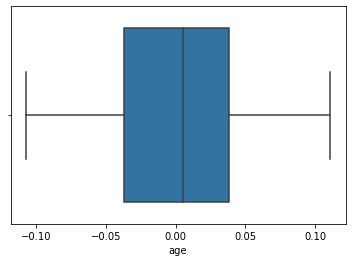

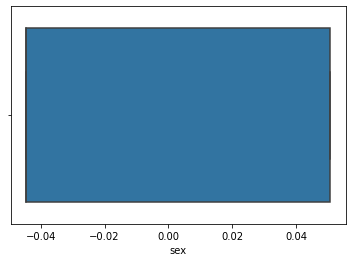

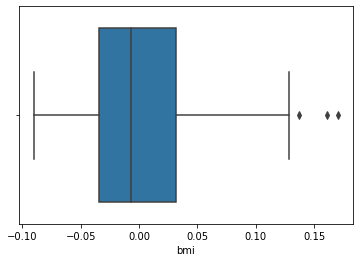

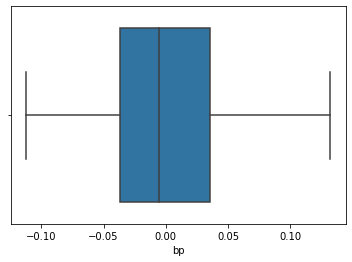

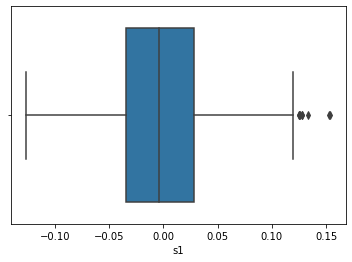

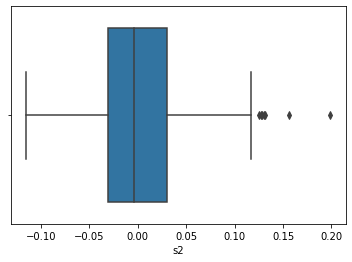

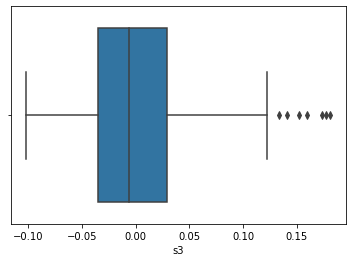

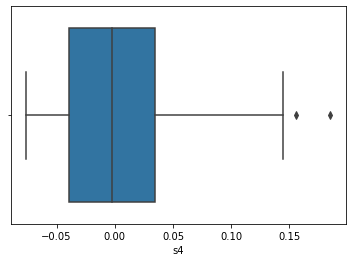

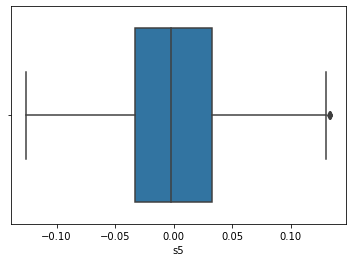

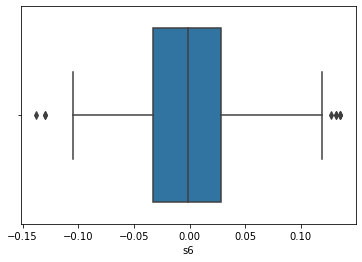

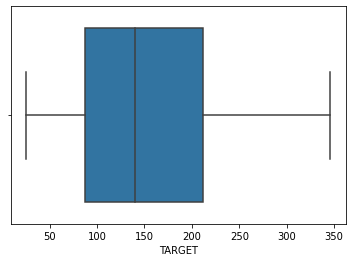

In [65]:
for columns in diabetes_df :
    plt.figure()
    sns.boxplot(diabetes_df[columns])

In [67]:
def multioutlier_treatment (data) :
    columns = data.drop(['TARGET'] , axis = 1)
    Q1 = diabetes_df.quantile(0.25)
    Q3 = diabetes_df.quantile(0.75)
    IQR = Q3-Q1
    row_index_list = list()
    print()
    
    for col in columns :
     lower_range = Q1[col] - 1.5*(IQR[col])
     upper_range = Q3[col] + 1.5*(IQR[col])
    
     lower_data = data[data[col].values < lower_range]
     upper_data = data[data[col].values > upper_range]
    
     lower_outliers = lower_data.value_counts().sum(axis = 0)
     upper_outliers = upper_data.value_counts().sum(axis = 0)
     total_outliers = lower_outliers + upper_outliers
    
     print('TOTAL NO. OF OUTLIERS IN ' +str(col)+ ' COLUMN : ' , total_outliers )
    
     lower_index = list(lower_data.index)
     upper_index = list(upper_data.index)
     total_index = list(lower_index + upper_index)
    
     row_index_list = list(row_index_list + total_index)
        
    row_index_list = list(set(row_index_list))
    row_index_list.sort()
    
    total_count = len(row_index_list)
    print()
    print('TOTAL NUMBER OF ROWS TO DELETE :' , total_count)
    print()
    print('UNIQUE ROWS TO BE DELETED :' , row_index_list)
    print()
    return data.drop(row_index_list)

print('SHAPE BEFORE DROPPING OUTLIERS :' , diabetes_df.shape)
diabetes_df = multioutlier_treatment(diabetes_df)
print('SHAPE AFTER DROPPING OUTLIERS :' , diabetes_df.shape)

SHAPE BEFORE DROPPING OUTLIERS : (442, 11)

TOTAL NO. OF OUTLIERS IN age COLUMN :  0
TOTAL NO. OF OUTLIERS IN sex COLUMN :  0
TOTAL NO. OF OUTLIERS IN bmi COLUMN :  3
TOTAL NO. OF OUTLIERS IN bp COLUMN :  0
TOTAL NO. OF OUTLIERS IN s1 COLUMN :  8
TOTAL NO. OF OUTLIERS IN s2 COLUMN :  7
TOTAL NO. OF OUTLIERS IN s3 COLUMN :  7
TOTAL NO. OF OUTLIERS IN s4 COLUMN :  2
TOTAL NO. OF OUTLIERS IN s5 COLUMN :  4
TOTAL NO. OF OUTLIERS IN s6 COLUMN :  9

TOTAL NUMBER OF ROWS TO DELETE : 31

UNIQUE ROWS TO BE DELETED : [23, 35, 58, 84, 117, 123, 141, 161, 168, 169, 202, 230, 245, 248, 256, 260, 261, 269, 276, 286, 287, 322, 346, 350, 353, 366, 367, 376, 406, 428, 441]

SHAPE AFTER DROPPING OUTLIERS : (411, 11)
